### Install Libraries

#### Importação das Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import yfinance as yf
import numpy as np
from scipy.stats import pearsonr, spearmanr
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('seaborn')

### Pearson Correlation

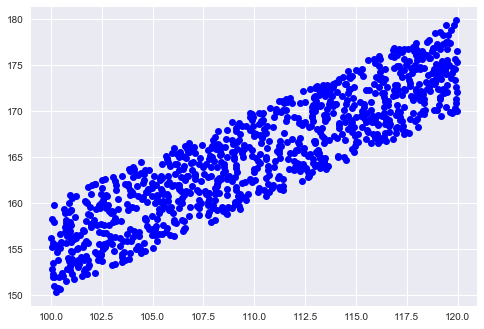

In [2]:
fig, ax1 = plt.subplots()

x = 20 * np.random.rand(1000) + 100
y = x + (10 * np.random.rand(1000) + 50)

ax1.plot(x, y, "bo")
plt.show()

In [3]:
pearson = pearsonr(x, y)
print("Correlação de Pearson : " + str(np.round(pearson[0],2)))

Correlação de Pearson : 0.9


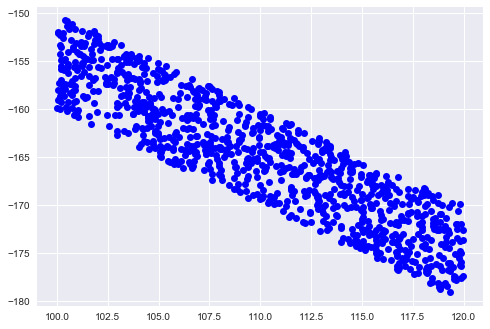

In [4]:
fig, ax1 = plt.subplots()

x = 20 * np.random.rand(1000) + 100
y = (x + (10 * np.random.rand(1000) + 50)) * -1

ax1.plot(x, y, "bo")
plt.show()

In [5]:
pearson = pearsonr(x, y)
print("Pearson Correlation: " + str(np.round(pearson[0],2)))

Pearson Correlation: -0.9


### Spearman Correlation

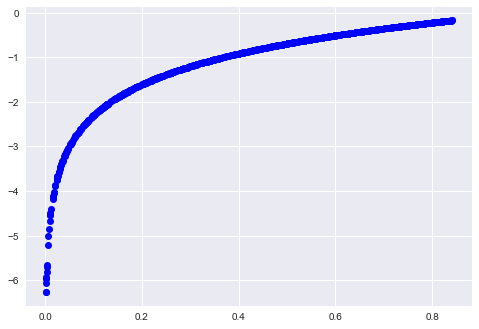

In [6]:
fig, ax1 = plt.subplots()

x = np.sin(np.random.rand(1000))
y = np.log(x)

ax1.plot(x, y, "bo")
plt.show()

In [9]:
sp = spearmanr(x, y)
print("Spearman Correlation: " + str(np.round(sp[0],2)))

Spearman Correlation: 1.0


In [10]:
p = pearsonr(x, y)
print("Pearson Correlation: " + str(np.round(p[0],2)))

Pearson Correlation: 0.87


### Download Data - Petrobras

Our data are based on shares of the company Petróleo Brasileiro S.A. — Petrobras (PETR4.SA). 

In [15]:
series_petr4 = yf.download("PETR4.SA", start="2015-01-01", end="2020-10-02")

[*********************100%***********************]  1 of 1 completed


In [16]:
series_petr4.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,9.99,9.99,9.35,9.36,8.683293,49559500
2015-01-05,9.14,9.19,8.53,8.56,7.941135,78385100
2015-01-06,8.71,8.83,8.04,8.28,7.681378,84723300
2015-01-07,8.56,8.73,8.36,8.67,8.043181,85531000
2015-01-08,8.79,9.39,8.74,9.23,8.562695,83306300


#### Time Series - Petrobras

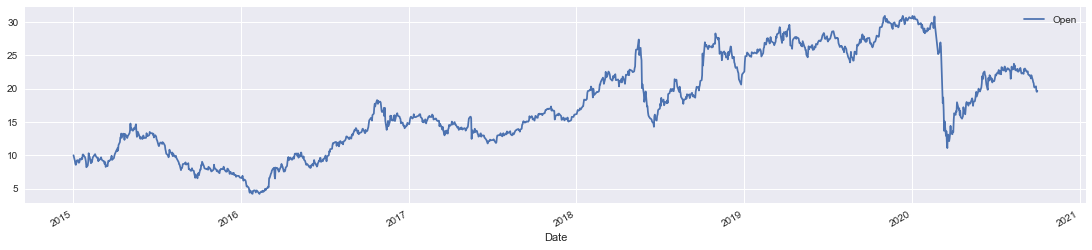

In [17]:
series_petr4[["Open"]].plot(figsize = (19, 4)) 
plt.show()

### Correlation Matrix

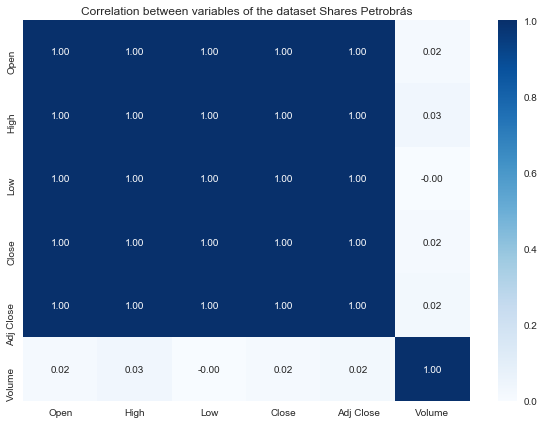

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(series_petr4.corr(method='spearman'),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlation between variables of the dataset Shares Petrobrás')
plt.show()

#### AutoCorrelation
#### OPEN

#### Measure at Intervals (Lags)

<br>
1-interval: measures how values from 1 distant period are related<br><br>
2-interval: measures how far 2-period values are related
<br><br>

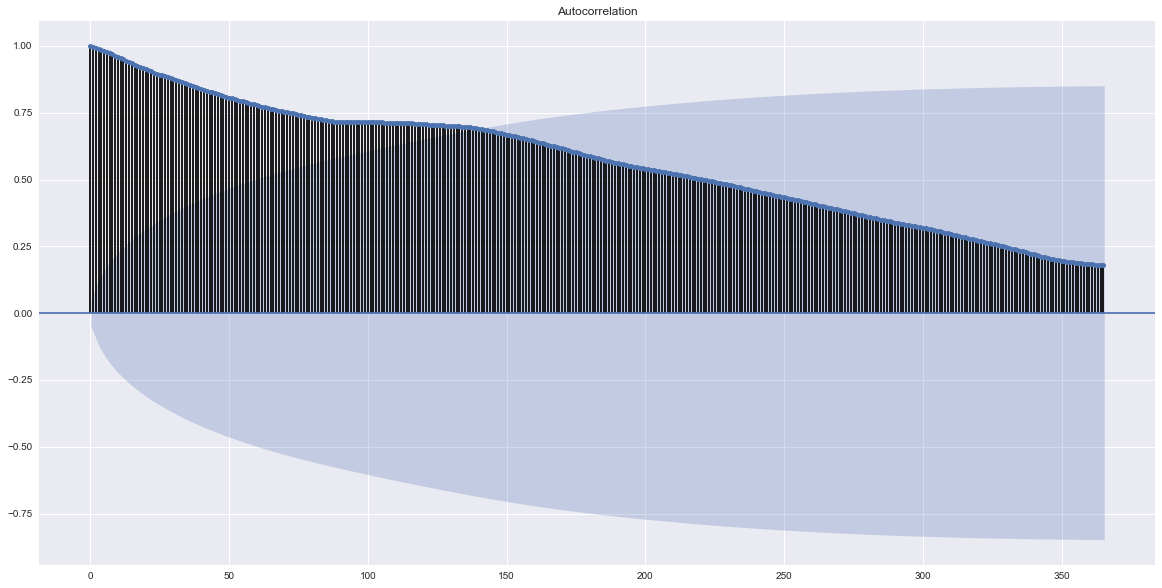

In [19]:
plt.rcParams['figure.figsize']=(20,10)
plot_acf(series_petr4['Open'], lags=365)
plt.show()

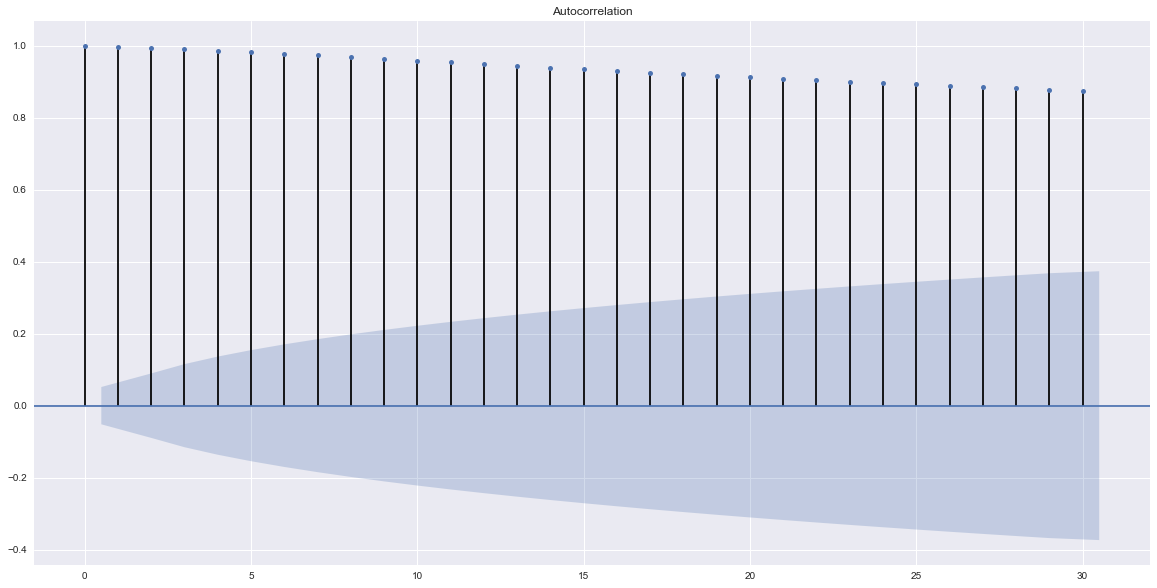

In [20]:
plt.rcParams['figure.figsize']=(20,10)
plot_acf(series_petr4['Open'], lags=30)
plt.show()